In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.decomposition import PCA
import heapq
import scipy

file="/home/shaoguang/anaconda3/shaoguang123/bishe_csg/hq0.csv"
hs300b=pd.read_csv("/home/shaoguang/anaconda3/shaoguang123/bishe_csg/hs300.csv",encoding="utf-8")
hq=pd.read_csv(file,encoding="utf-8")

In [19]:
%matplotlib inline

In [20]:
hq1=hq.iloc[:,[0,1,2,7,9]]
hq1

,指数代码,指数名称,发布日期,成交量(亿股),涨跌幅(%)
0,801010,农林牧渔,2013/12/31 0:00,4.37,-0.03
1,801010,农林牧渔,2013/12/30 0:00,4.27,0.79
2,801010,农林牧渔,2013/12/27 0:00,3.97,1.42
3,801010,农林牧渔,2013/12/26 0:00,4.97,-2.53
4,801010,农林牧渔,2013/12/25 0:00,4.64,0.64
5,801010,农林牧渔,2013/12/24 0:00,4.78,0.92
6,801010,农林牧渔,2013/12/23 0:00,4.69,-0.41
7,801010,农林牧渔,2013/12/20 0:00,4.65,0.15
8,801010,农林牧渔,2013/12/19 0:00,4.37,-1.46
9,801010,农林牧渔,2013/12/18 0:00,3.82,0.03


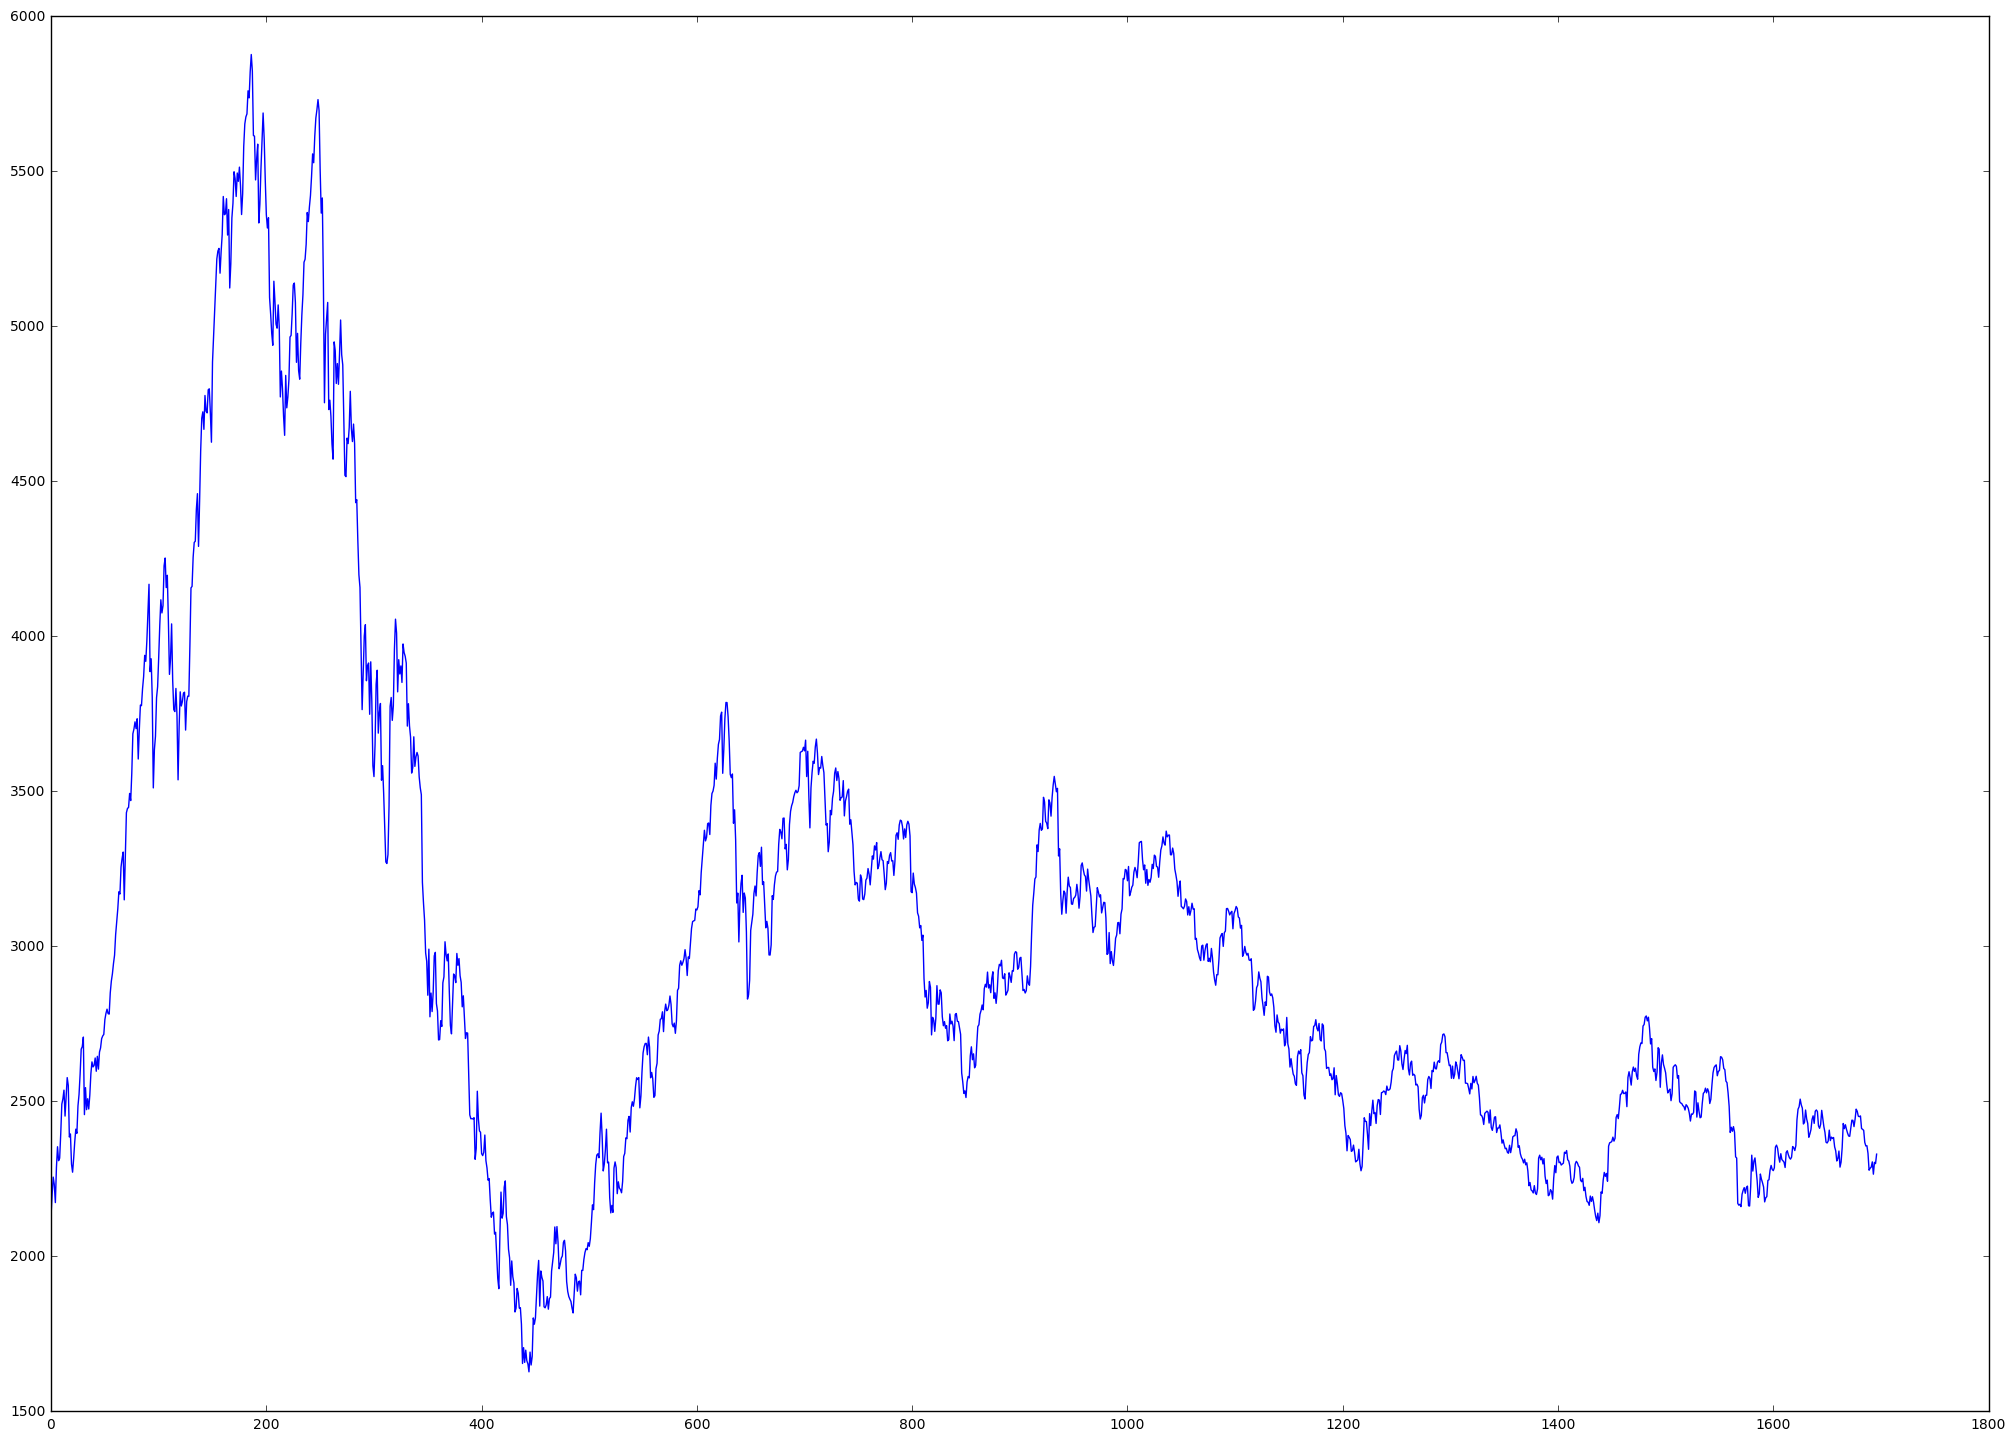

In [21]:
#沪深300走势
close=hs300b.iloc[:,4]
plt.figure(figsize=(25,18))
plt.plot(close)

In [22]:
col=int(hq1.iloc[:,0:1].size)
dat=int(col/23)
val=np.zeros((dat,23))
row_list=np.zeros(23)
Column_list=np.arange(0,dat,1)
for i in range(23):
    row_list[i]=hq1.iloc[i*dat,0]
for i in range(dat):
    for j in range(23):
        val[dat-i-1][j]=hq1.iloc[i+dat*j,4]

In [23]:
#求得每日各行业板块涨幅
data=pd.DataFrame(val,index=Column_list,columns=row_list)
data

,801010.0,801020.0,801030.0,801040.0,801050.0,801060.0,801070.0,801080.0,801090.0,801100.0,...,801140.0,801150.0,801160.0,801170.0,801180.0,801190.0,801200.0,801210.0,801220.0,801230.0
0,4.26,1.97,3.19,1.53,3.87,3.95,3.28,4.69,4.22,4.32,...,4.83,4.42,3.91,3.71,3.54,2.18,2.93,2.73,3.08,5.02
1,2.36,1.18,3.75,7.05,2.87,1.92,2.38,0.97,2.67,0.93,...,2.01,1.87,1.44,1.67,2.49,4.26,2.16,-0.67,2.42,1.94
2,1.64,3.46,1.83,1.48,4.47,2.51,1.14,2.92,2.08,2.87,...,2.72,2.36,2.17,3.55,5.49,2.47,3.06,1.26,1.10,3.03
3,-0.02,-1.19,-0.71,-1.91,-2.12,-0.04,-0.36,2.28,-0.99,0.37,...,-0.23,1.74,-1.24,0.45,-2.21,-2.05,0.44,1.50,-0.37,0.20
4,-3.07,-6.65,-4.04,-3.73,-2.89,-4.40,-2.81,-4.29,-3.67,-4.69,...,-3.51,-2.27,-5.04,-3.21,-3.23,-0.55,-2.25,-2.93,-4.58,-2.80
5,5.11,4.34,4.62,5.06,4.00,4.78,6.17,5.19,6.21,4.69,...,5.18,5.93,4.32,4.56,6.47,4.67,6.02,5.46,4.76,6.00
6,3.25,-0.40,2.25,1.93,3.33,3.60,3.50,1.82,2.73,3.20,...,2.35,4.68,1.05,0.94,5.92,2.13,7.10,4.88,2.53,3.71
7,-0.42,-0.57,-0.40,0.86,-2.49,-0.45,-0.92,-1.32,-0.26,0.70,...,-0.92,0.04,0.25,-1.61,-8.47,-2.93,1.09,-3.60,-1.51,-2.08
8,3.19,1.97,1.73,-2.10,3.35,1.90,2.01,4.66,1.90,3.85,...,2.67,4.52,0.60,0.67,-2.84,-3.09,2.44,-1.26,2.39,2.10
9,4.41,3.54,2.86,1.15,3.75,3.80,4.00,3.87,6.14,4.42,...,5.21,2.78,4.37,4.15,1.69,2.65,3.47,1.04,4.26,4.46


In [25]:
#求取每日涨幅排行前5的行业
order1=[]
order2=[]
order3=[]
order4=[]
order5=[]
for i in range(dat):
    Sector_list=[]
    for j in range(23):
        Sector_list.append((row_list[j],val[i][j]))
    top = heapq.nlargest(5,Sector_list,key=lambda s: s[1])
    order1.append(top[0][0]),order2.append(top[1][0]),order3.append(top[2][0]),order4.append(top[3][0]),order5.append(top[4][0])
order_list=pd.DataFrame()
order_list.insert(0,"order1",order1),order_list.insert(1,"order2",order2),order_list.insert(2,"order3",order3),order_list.insert(3,"order4",order4),order_list.insert(4,"order5",order5)
order_list

,order1,order2,order3,order4,order5
0,801110.0,801230.0,801140.0,801080.0,801150.0
1,801040.0,801190.0,801030.0,801120.0,801050.0
2,801180.0,801050.0,801170.0,801020.0,801200.0
3,801120.0,801080.0,801150.0,801210.0,801130.0
4,801120.0,801190.0,801130.0,801200.0,801150.0
5,801180.0,801090.0,801070.0,801200.0,801230.0
6,801200.0,801180.0,801210.0,801150.0,801130.0
7,801200.0,801040.0,801100.0,801120.0,801160.0
8,801080.0,801150.0,801100.0,801120.0,801050.0
9,801090.0,801140.0,801230.0,801100.0,801010.0


In [27]:
#PCA降维
pca=PCA(n_components=10,copy=False)
A=pca.fit_transform(data)

In [28]:
#行业轮动匹配所需函数
def isIn(a,b,data2):
    top_3=[]
    for i in range(3):
        top_3.append(data2.iloc[b,i])
    if data2.iloc[a,0] in top_3:
        return True
    else:
        return False

In [29]:
n=3 #隐状态数目
T=350 #样本窗口大小
t=1 #预测天数
w_n=5 #与当前交易日相同市场隐含状态相同行业轮动特征且似然值最接近的天数
index = 0
step = t
win=0
lose=0
win0=0
win1=0
win2=0
win3=0
win4=0
win5=0
win6=0
show0=np.zeros(dat)
show1=np.zeros(dat)
show2=np.zeros(dat)

In [31]:
while index+T < len(A)-step:
    model = hmm.GaussianHMM(n_components= n, covariance_type="spherical", n_iter=1000).fit(A[index:index+T])
    hist_info = [] 
    hiddenStatus = model.predict(A[index:index+T])
    
    #print (hiddenStatus)
    for i in range(index, index+T):
        #hiddenStatu = model.predict(A[index+i : index+i+1])
        score = model.score(A[i: i+1])
        day_tuple = (i, hiddenStatus[i-index], score)
        hist_info.append(day_tuple) 
        
    #print (hist_info)
    last_hiddenStatus = hist_info[-1][1]
    last_score = hist_info[-1][2]
    last_index = hist_info[-1][0]
    print(last_index)
    
    sameStatus = []
    cnt=0
    for (x,y,z) in hist_info[:-1]:
        if y == last_hiddenStatus:#市场隐含状态匹配
            if  isIn(last_index,x,order_list) and isIn(last_index-1,x-1,order_list):#行业轮动特征匹配
                diff = abs(z - last_score)
                sameStatus.append((x, diff))
                cnt+=1
    if(cnt<w_n): 
        index += step
        continue
    pos_diffs = heapq.nsmallest(w_n, sameStatus, key=lambda s: s[1])
        
    #加权预测
    weights = [5,4,3,2,1]
    d={}
    for i in range(w_n):
        if order_list.iloc[pos_diffs[i][0]+1,0] in d:
            d[order_list.iloc[pos_diffs[i][0]+1,0]]+=weights[i]/2
        else:
            d[order_list.iloc[pos_diffs[i][0]+1,0]]=weights[i]/2
                
    for i in range(w_n):
        for j in range(1,3):
            if order_list.iloc[pos_diffs[i][0]+1,j] in d:
                d[order_list.iloc[pos_diffs[i][0]+1,j]]+=weights[i]*(3-j)/6
    d=sorted(d.items(),key = lambda asd:asd[1],reverse=True)
    print("&&&&&&&&&&&&&&&&&&&&&&&&&&")
    print(d)
            
    
    top_5=[]
    for i in range(5):
        top_5.append(order_list.iloc[last_index+1,i])
    #print("####################")
    print(last_index)

    print(top_5)
    if len(d)>4:
        index += step
        continue

    if d[0][0] in top_5 or d[1][0] in top_5 or (len(d)<3 or d[2][0] in top_5):
        win+=1
        print("win")
        if d[0][0] in top_5:
            win0+=1
            show0[last_index]=1
        else:
            show0[last_index]=-1
        
        if len(d)<2:
            if d[0][0] in top_5:
                win1+=1
        elif d[1][0] in top_5:
            win1+=1
            
        if len(d)<2:
            if d[0][0] in top_5:
                win2+=1
        elif len(d)<3:
            if d[0][0] in top_5 or d[1][0] in top_5:
                win2+=1
        elif d[2][0] in top_5:
            win2+=1
        
        if len(d)<2:
            if d[0][0] in top_5:
                win3+=1
        elif d[0][0] in top_5 and d[1][0] in top_5:
            win3+=1
            
        if len(d)<2:
            if d[0][0] in top_5:
                win4+=1
                show1[last_index]=1
        elif d[0][0] in top_5 or d[1][0] in top_5:
            win4+=1
            show1[last_index]=1
        else:
            show1[last_index]=-1
         
        if len(d)<2:
            if d[0][0] in top_5:
                win5+=1
        elif len(d)<3:
            if d[0][0] in top_5 and d[1][0] in top_5:
                win5+=1
        elif d[0][0] in top_5 and d[1][0] in top_5 and d[2][0] in top_5:
            win5+=1
            
        if len(d)<2:
            if d[0][0] in top_5:
                win6+=1
                show2[last_index]=1
        elif len(d)<3:
            if d[0][0] in top_5 or d[1][0] in top_5:
                win6+=1
                show2[last_index]=1
        elif d[0][0] in top_5 or d[1][0] in top_5 or d[2][0] in top_5:
            win6+=1
            show2[last_index]=1
        else:
            show2[last_index]=-1
    else:
        lose+=1
    index += step

print(win)
print(lose)
print(win/(win+lose))
print(win0/(win+lose))
print(win1/(win+lose))
print(win2/(win+lose))
print(win3/(win+lose))
print(win4/(win+lose))
print(win5/(win+lose))
print(win6/(win+lose))
print("Done")

349
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801180.0, 3.5), (801190.0, 3.166666666666667), (801020.0, 2.833333333333333), (801060.0, 1.0), (801050.0, 0.5)]
349
[801020.0, 801190.0, 801120.0, 801220.0, 801100.0]
350
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801040.0, 4.666666666666667), (801010.0, 3.0), (801190.0, 1.0)]
350
[801050.0, 801020.0, 801030.0, 801010.0, 801130.0]
win
351
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801210.0, 2.666666666666667), (801180.0, 2.5), (801050.0, 2.3333333333333335), (801130.0, 1.5), (801020.0, 0.5)]
351
[801020.0, 801030.0, 801160.0, 801120.0, 801070.0]
352
353
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801180.0, 6.0), (801230.0, 1.8333333333333335), (801050.0, 0.5)]
353
[801210.0, 801110.0, 801050.0, 801130.0, 801100.0]
win
354
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801180.0, 3.1666666666666665), (801040.0, 2.0), (801020.0, 1.5), (801100.0, 1.1666666666666665), (801030.0, 1.0)]
354
[801210.0, 801100.0, 801220.0, 801230.0, 801180.0]
355
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801050.0, 5.0), (801040.0, 1.8333333333333333),

<function matplotlib.pyplot.show>

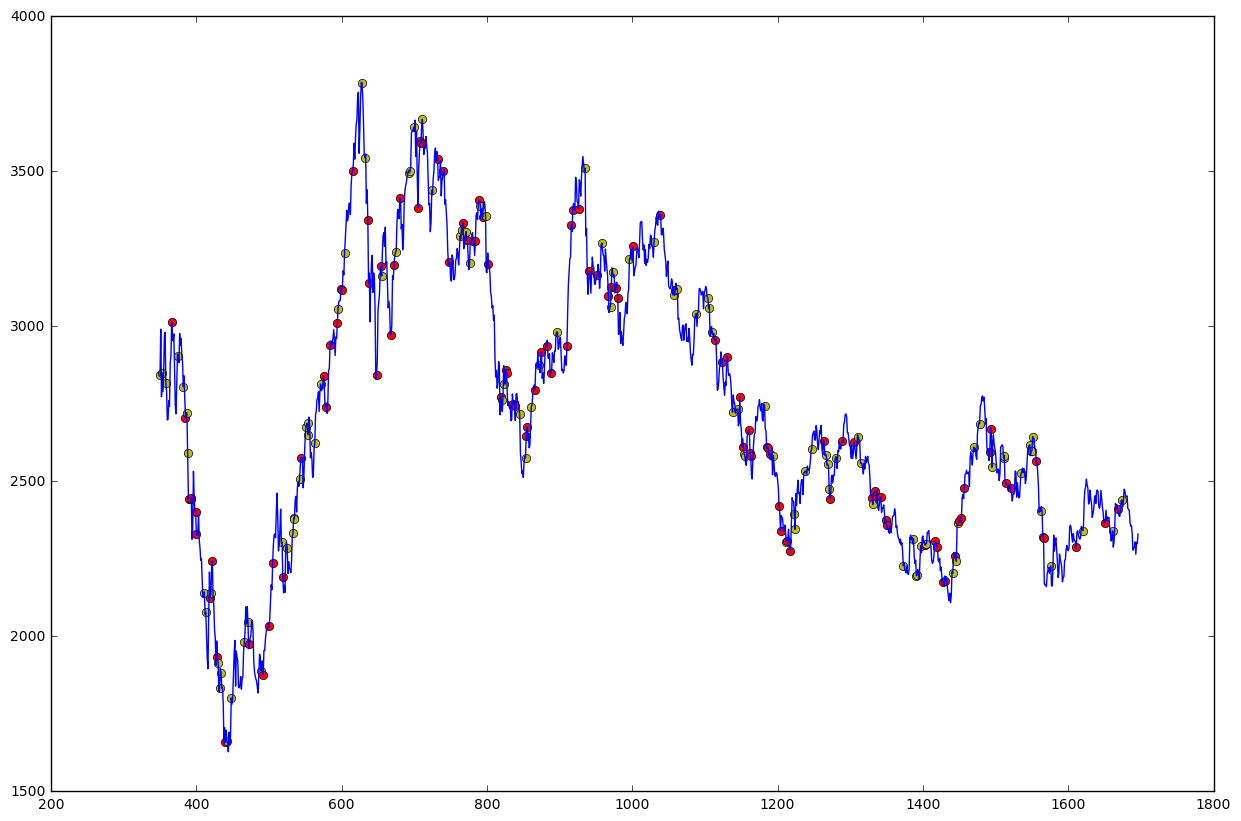

In [32]:
plt.figure(figsize=(15,10))
for i in range(350,dat):
    if show0[i]==1:
        plt.plot(i,close[i],'or')
        plt.hold
    elif show0[i]==-1:
        plt.plot(i,close[i],'oy')
        plt.hold
plt.plot(close[350:])
plt.show
#plt.plot(close[:440],'o')
#plt.hold
#plt.plot(close[440:],'or')

<function matplotlib.pyplot.show>

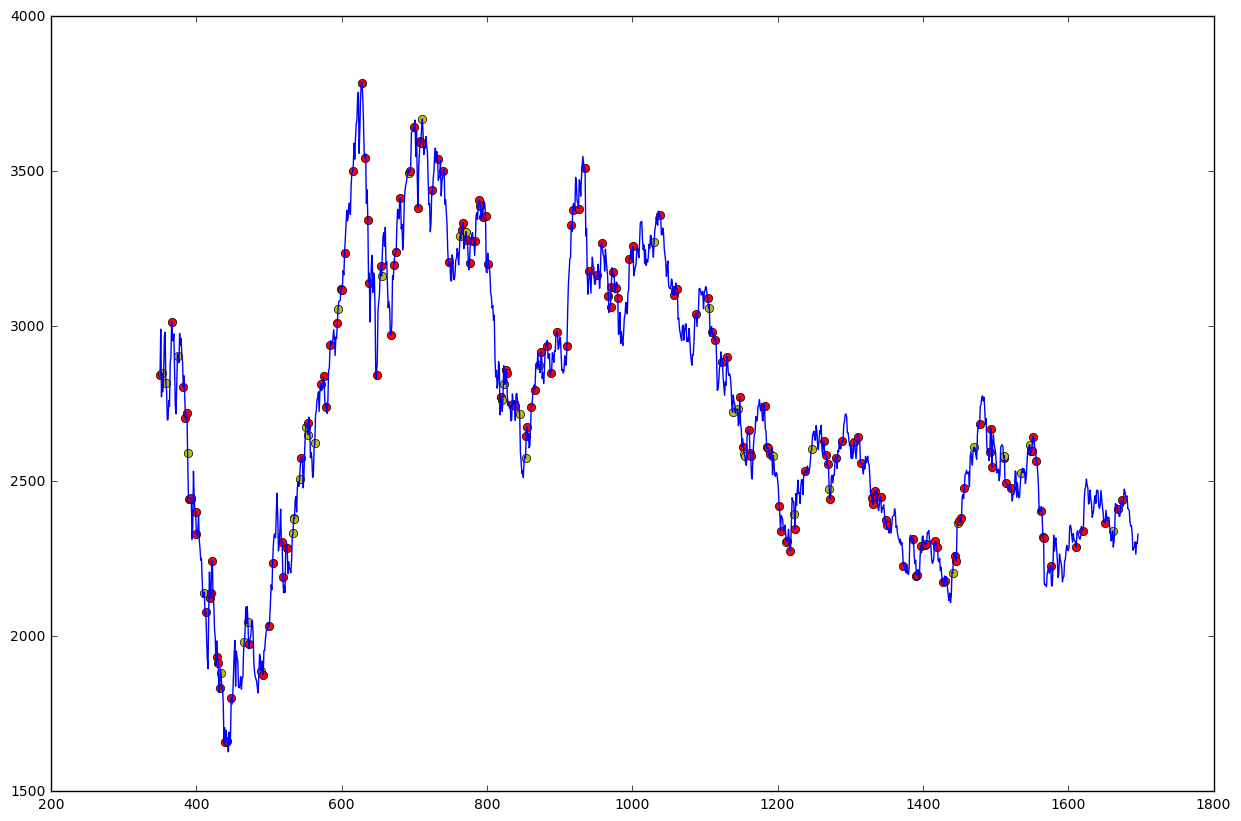

In [33]:
plt.figure(figsize=(15,10))
for i in range(350,dat):
    if show1[i]==1:
        plt.plot(i,close[i],'or')
        plt.hold
    elif show1[i]==-1:
        plt.plot(i,close[i],'oy')
        plt.hold
plt.plot(close[350:])
plt.show
#plt.plot(close[:440],'o')
#plt.hold
#plt.plot(close[440:],'or')

In [34]:
plt.figure(figsize=(15,10))
for i in range(350,dat):
    if show[i]==1:
        plt.plot(i,close[i],'or')
        plt.hold
    elif show[i]==-1:
        plt.plot(i,close[i],'oy')
        plt.hold
plt.plot(close[350:])
plt.show
#plt.plot(close[:440],'o')
#plt.hold
#plt.plot(close[440:],'or')

NameError: name 'show' is not defined